In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
# Load the Iris dataset
iris = load_iris.load_iris()

In [22]:
dir(iris)
# Convert to DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df=iris_df.drop(['target','sepal width (cm)','sepal length (cm)'], axis=1)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [24]:
kmeans = KMeans(n_clusters=3)
ypred = kmeans.fit_predict(df)
ypred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [25]:
df['cluster'] = ypred
df.head()



,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [26]:
df.groupby('cluster').mean()

,petal length (cm),petal width (cm)
cluster,,
0,4.292593,1.359259
1,1.462000,0.246000
2,5.626087,2.047826


In [27]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df3.head()




,petal length (cm),petal width (cm),cluster
77,5.0,1.7,2
83,5.1,1.6,2
100,6.0,2.5,2
101,5.1,1.9,2
102,5.9,2.1,2


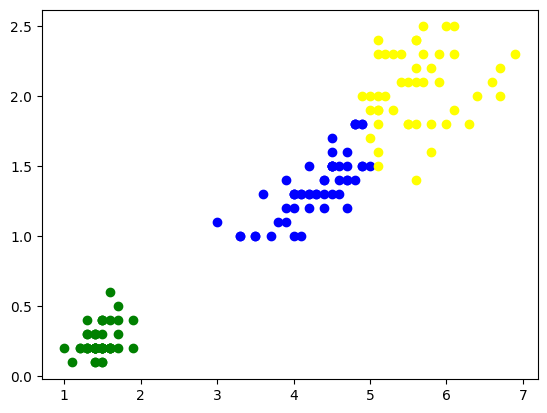

In [28]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')


In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

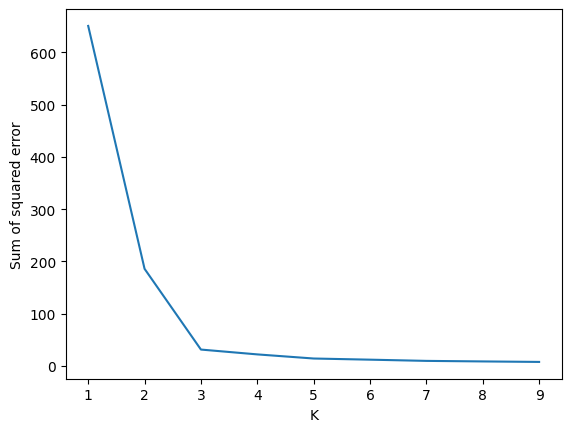

In [33]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
import pickle 
# Save the model to a file
with open("kmeans.model",'wb') as f:
    pickle.dump(kmeans,f)